# **IMPORTING LIBS**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import collections
from sklearn.metrics import r2_score
import re
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
%matplotlib inline

# **IMPORTING DATASET**

In [2]:
df_train = pd.read_csv("train-data.csv")

In [3]:
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# **CLEANING DATASET & MISSING VALUES**

#### Number of null row in columns

In [4]:
df_train.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

#### Percentage of data missing

In [5]:
(df_train.isnull().sum() / len(df_train)) * 100

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

#### Renaming columns of dataset

In [6]:
df_train = df_train.rename(columns = {'Unnamed: 0': 'id'})

In [7]:
df_train.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### Seats Column

In [8]:
df_train.groupby('Seats')['id'].nunique()

Seats
0.0        1
2.0       16
4.0       99
5.0     5014
6.0       31
7.0      674
8.0      134
9.0        3
10.0       5
Name: id, dtype: int64

In [9]:
df_train['Seats'].mode()

0    5.0
dtype: float64

In [10]:
df_train["Seats"].fillna(value = 5.0, inplace=True)
df_train.Seats[df_train.Seats == 0.0] = 5.0
df_train.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                   0
New_Price            5195
Price                   0
dtype: int64

### Mileage Column

In [11]:
df_train.groupby('Mileage')['id'].nunique()

Mileage
0.0 kmpl      68
10.0 kmpl     10
10.1 kmpl      7
10.13 kmpl     3
10.2 kmpl      6
              ..
9.52 kmpl      2
9.7 kmpl       1
9.74 kmpl      2
9.8 kmpl       4
9.9 kmpl       3
Name: id, Length: 442, dtype: int64


#### *Removing the string part and converting to the float, Taking mode and will replace emply rows with mode* 

In [12]:
df_train.Mileage[df_train.Mileage == '0.0 kmpl'] = np.nan
df_train['Mileage'] = df_train['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', 
                                                                 r'\1', str(x)))
df_train['Mileage'] = df_train['Mileage'].astype(float)
df_train['Mileage'].mode()

0    17.0
dtype: float64

In [13]:
df_train['Mileage'].fillna(value = 17.0, inplace = True)
df_train.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 36
Power                  36
Seats                   0
New_Price            5195
Price                   0
dtype: int64

### Engine Column

In [14]:
df_train.groupby('Engine')['id'].nunique()

Engine
1047 CC      4
1061 CC     30
1086 CC    108
1120 CC     54
1150 CC      7
          ... 
970 CC       1
993 CC      14
995 CC      10
998 CC     259
999 CC      29
Name: id, Length: 146, dtype: int64

#### *Removing the string part and converting to the float, Taking mode and will replace emply rows with mode* 

In [15]:
df_train['Engine'] = df_train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_train['Engine'] = df_train['Engine'].astype(float)
df_train['Engine'].mode()

0    1197.0
dtype: float64

In [16]:
df_train['Engine'].fillna(value = 1197.0, inplace = True)
df_train.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  36
Seats                   0
New_Price            5195
Price                   0
dtype: int64

### Power Column

In [17]:
df_train['Power'] = df_train['Power'].str.split(' ').str[0]
# including nan rows there is data in this column of 'null' value
df_train.Power[df_train.Power == 'null'] = np.NaN
df_train['Power'].isnull().sum()

143

In [18]:
df_train['Power'] = df_train['Power'].astype(float)
df_train['Power'].mode()

0    74.0
dtype: float64

In [19]:
df_train['Power'].fillna(value = 74, inplace = True)
df_train.isna().sum()

id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

### Name Column

In [20]:
df_train['Name'] = df_train['Name'].str.split(' ').str[0]
df_train.groupby('Name')['id'].nunique()

Name
Ambassador          1
Audi              236
BMW               267
Bentley             1
Chevrolet         121
Datsun             13
Fiat               28
Force               3
Ford              300
Honda             608
Hyundai          1107
ISUZU               2
Isuzu               1
Jaguar             40
Jeep               15
Lamborghini         1
Land               60
Mahindra          272
Maruti           1211
Mercedes-Benz     318
Mini               26
Mitsubishi         27
Nissan             91
Porsche            18
Renault           145
Skoda             173
Smart               1
Tata              186
Toyota            411
Volkswagen        315
Volvo              21
Name: id, dtype: int64

In [21]:
df_train.Name[df_train.Name == 'Isuzu'] = 'ISUZU'

#### Deleting new price column because of lots of missing values are there in it

In [22]:
del df_train['New_Price']

### This data is for Visualizing with cleaned dataset

In [23]:
dataset = df_train.copy()

In [24]:
del df_train['id']

In [25]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

#### Converting datatypes from int to float

In [26]:
df_train['Year'] = df_train['Year'].astype(float)
df_train['Kilometers_Driven'] = df_train['Kilometers_Driven'].astype(float)

#### For improving the prediction values

In [27]:
df_train['Price_log'] = np.log1p(df_train['Price'].values)
del df_train['Price']

# **PRICE PREDICTION**

#### Getting rid of categorical data

In [28]:
df_train = pd.get_dummies(df_train, drop_first = True)

#### Spliting the dataset

In [29]:
X = df_train.drop(columns = ['Price_log'], axis = 1)
y = df_train.iloc[:, 6].values

#### Spliting dataset into train and test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Fitting Data & Predicting in Linear Regression

In [31]:
regressor_1 = LinearRegression()
regressor_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred_1 = regressor_1.predict(X_test)

In [33]:
regressor_1.score(X_test,y_test)

0.9224124177741427

## Fitting the data to Random Forest Tree Regression

In [34]:
regressor_2 = RandomForestRegressor(random_state = 0)
regressor_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [35]:
y_pred_2 = regressor_2.predict(X_test)

In [36]:
regressor_2.score(X_test,y_test)

0.9433713928852715

## Fitting the data to Decision Tree Algorithm

In [37]:
regressor_3 = DecisionTreeRegressor(random_state = 0)
regressor_3.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [38]:
y_pred_3 = regressor_3.predict(X_test)

In [39]:
regressor_3.score(X_test, y_test)

0.8932155423683642

#### I also performed on Ridge and Lasso Algorithm and got accuracy 90.6 and 89.8 respectively

## <font color='green'>Prefer Random Forest Tree Regression Algorithm.</font>

# **VISUALIZING THE DATASET**

In [40]:
plt.style.use('ggplot')
colors = ['#FF8C73','#66b3ff','#99ff99','#CA8BCA', '#FFB973', '#89DF38', '#8BA4CA', '#ffcc99', 
          '#72A047', '#3052AF', '#FFC4C4']

### Year wise count

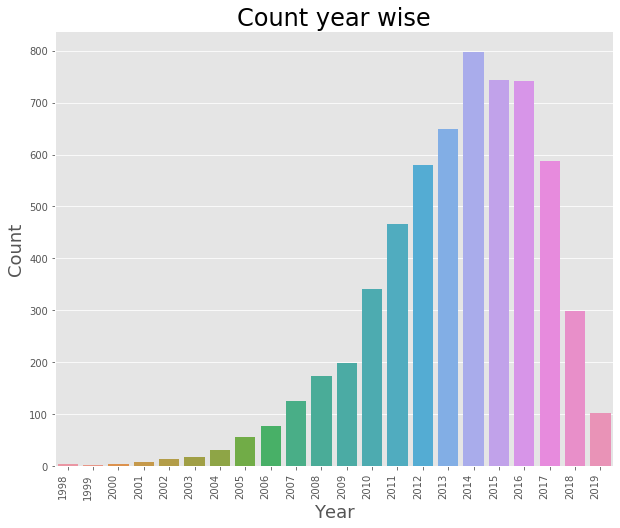

In [41]:
plt.figure(figsize = (10,8))
bar1 = sns.countplot(dataset['Year'])
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Count year wise', size = 24)
plt.xlabel('Year', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

### Fuel Types count

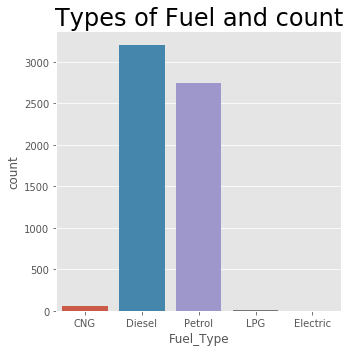

In [42]:
plt.figure(figsize = (5,5))
sns.countplot(dataset['Fuel_Type'])
plt.title('Types of Fuel and count', size = 24)
plt.tight_layout()
plt.show()

### Loction graph and percentage

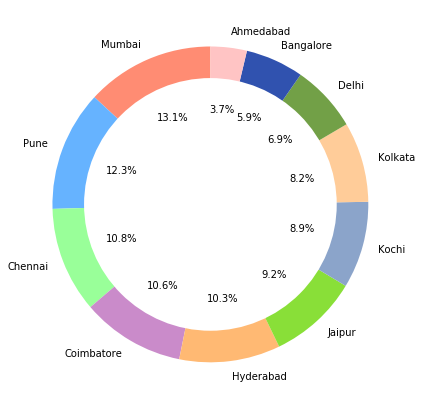

In [43]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Location'].value_counts(), startangle = 90, autopct = '%1.1f%%', colors = colors, 
        labels = dataset['Location'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Types of Transmission and count

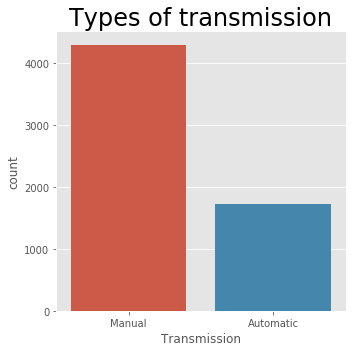

In [44]:
plt.figure(figsize = (5,5))
sns.countplot(dataset['Transmission'])
plt.title('Types of transmission', size = 24)
plt.tight_layout()
plt.show()

# **END**